In [1]:
__author__ = "Philipp Kats"
__date__ = "2015_10_15"

import pandas as pd
import numpy as np

import pylab as plt
import os
import json

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

import geopandas as gp
from geopandas.tools import sjoin
from shapely.geometry import Point

%pylab inline

/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
PARQA = os.getenv('PARQA') #basic path

In [3]:
calls = pd.read_csv( PARQA + 'data/2015_10_9_311_parks.csv')

/Users/casy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (18,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
calls.columns

Index([u'Unnamed: 0', u'Unique Key', u'Created Date', u'Closed Date',
       u'Agency', u'Agency Name', u'Complaint Type', u'Descriptor',
       u'Location Type', u'Incident Zip', u'Incident Address', u'Street Name',
       u'Cross Street 1', u'Cross Street 2', u'Intersection Street 1',
       u'Intersection Street 2', u'Address Type', u'City', u'Landmark',
       u'Facility Type', u'Status', u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction'

In [5]:
parkCalls = calls.groupby(['Park Facility Name','year']).size()
print parkCalls

Park Facility Name                               year
100 Percent Playground - PS 242                  2010    5
                                                 2011    6
                                                 2012    5
                                                 2013    2
                                                 2014    4
                                                 2015    3
101 Street Soccer Field                          2010    1
                                                 2011    6
                                                 2012    2
                                                 2013    2
                                                 2014    1
                                                 2015    7
107th Street Pier                                2010    2
                                                 2011    2
                                                 2012    4
                                                 2014    3
  

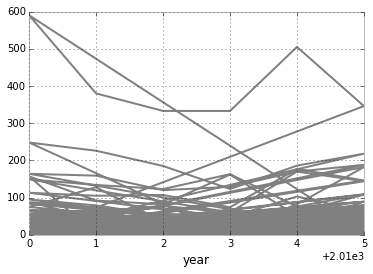

In [37]:
parkCalls.reset_index().plot(kind='line', x='year',y=0, color='grey', legend=False);

In [6]:
parkCalls2 = parkCalls.unstack(level=-1)
parkCalls2

/Users/casy/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


year,2010,2011,2012,2013,2014,2015
Park Facility Name,,,,,,
100 Percent Playground - PS 242,5,6,5,2,4,3
101 Street Soccer Field,1,6,2,2,1,7
107th Street Pier,2,2,4,NaN,3,1
115th Street Playground,1,4,1,2,2,NaN
146 St Playground,NaN,NaN,NaN,2,1,2
174 St Playground,1,NaN,NaN,1,1,NaN
174th St Playground,1,2,3,NaN,4,5
35 Playground,3,NaN,NaN,2,3,2
6BC Botanical Garden,NaN,NaN,NaN,NaN,2,1


In [7]:
parkCalls2.to_csv(PARQA + 'data/311park_time_series.csv')

## Now same trick by Borough

In [10]:
pBoroCalls = calls.groupby(['Park Borough','year']).size().unstack(level=-1)
pBoroCalls.to_csv(PARQA + 'data/311boro_time_series.csv')

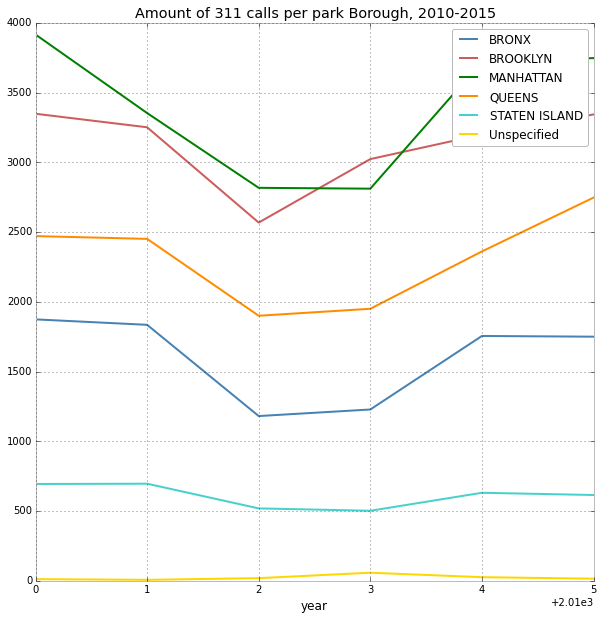

In [35]:
for name, b in calls.groupby('Park Borough'):
    b.groupby('year').size().plot(kind='line', label=name, figsize=(10,10))

plt.title('Amount of 311 calls per park Borough, 2010-2015')
plt.legend();